# 1.Problem Statement
Data structure:

    1. Title
    2. Question body
    3. Answer of the question
    4. Votes of each answers

# 2.Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Authenticate google account for acces google public dataset
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery

In [ ]:
# project id which we can get from GCP
project_id = 'stackoverflowdata-450614'

In [ ]:
# Google credentials which we can get fromGCP as json file and store it to drive
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/StackOverflowData/pretrain_data/stackoverflowdata-450614-4d9ab32e59a2.json"

In [ ]:
client = bigquery.Client()
dataset_reference = client.dataset('stackoverflow', project='bigquery-public-data')
dataset = client.get_dataset(dataset_reference)

In [ ]:
# list of tables availbale in stackoverflow dataset
# reference : https://www.kaggle.com/fluffyhamster/stack-overflow-data
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


In [ ]:
# post question and post question tables for joining.

In [ ]:
# reference: https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=oKNxsRvuKtAz

df = pd.io.gbq.read_gbq('''
  SELECT q.id, q.title, q.body, q.tags, a.body as answers,
  a.score FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
  INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
  ON q.id = a.parent_id
  WHERE q.tags LIKE '%java%'
  ORDER BY q.id desc
  LIMIT 2000000
  ''', project_id=project_id, dialect='standard')

<ipython-input-10-067313dbcc57>:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.io.gbq.read_gbq('''
/usr/local/lib/python3.11/dist-packages/pandas/io/gbq.py:207: LargeResultsWarning: Recommendation: Your results are 4.8 GiB. Consider using BigQuery DataFrames (https://bit.ly/bigframes-intro)to process large results with pandas compatible APIs with transparent SQL pushdown to BigQuery engine. This provides an opportunity to save on costs and improve performance. Please reach out to bigframes-feedback@google.com with any questions or concerns. To disable this message, run warnings.simplefilter('ignore', category=pandas_gbq.exceptions.LargeResultsWarning)
  return pandas_gbq.read_gbq(


In [ ]:
df.head()

,id,title,body,tags,answers,score
0,5701633,Java exit a program without quitting JVM,<p>I want to exit a java process and free all ...,java|jvm,<p>There is one JVM process per running Java a...,9
1,17913681,How do I use .toLocaleTimeString() without dis...,<p>I'm currently attempting to display the use...,javascript|time,<p>With locales :</p>\n\n<pre><code>var date =...,11
2,38082965,Symbol.species example from MDN not making sense?,<p>I was just translating an article about <a ...,javascript,<p>You are missing an important detail. If you...,14
3,41058998,Spark: How RDD.map/mapToPair work with Java,"<p>I have some pairs cw (Integer i, String wor...",java|apache-spark|tuples|rdd|keyvaluepair,"<p>If I understand you correctly, you have bel...",10
4,52228470,Exception in JPA when using seed file for Post...,"<p>I am using Spring Boot 2 with JPA, and I le...",java|spring|postgresql|hibernate|jpa,"<p>The problem was not the syntax, because the...",12


In [ ]:
df.shape

(2000000, 6)

In [ ]:
file_path = "/content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv"
df.to_csv(file_path, index=False)
print(f"File đã được lưu tại: {file_path}")

File đã được lưu tại: /content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv


## Data Analysis and EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv')
df

,id,title,body,tags,answers,score
0,5701633,Java exit a program without quitting JVM,<p>I want to exit a java process and free all ...,java|jvm,<p>There is one JVM process per running Java a...,9
1,17913681,How do I use .toLocaleTimeString() without dis...,<p>I'm currently attempting to display the use...,javascript|time,<p>With locales :</p>\n\n<pre><code>var date =...,11
2,38082965,Symbol.species example from MDN not making sense?,<p>I was just translating an article about <a ...,javascript,<p>You are missing an important detail. If you...,14
3,41058998,Spark: How RDD.map/mapToPair work with Java,"<p>I have some pairs cw (Integer i, String wor...",java|apache-spark|tuples|rdd|keyvaluepair,"<p>If I understand you correctly, you have bel...",10
4,52228470,Exception in JPA when using seed file for Post...,"<p>I am using Spring Boot 2 with JPA, and I le...",java|spring|postgresql|hibernate|jpa,"<p>The problem was not the syntax, because the...",12
...,...,...,...,...,...,...
1999995,9467520,Why does JavaMail use System.getProperties() ?,<p>Why do we need to add the properties like <...,java|jakarta-mail|system-properties,<p>You don't actually need to add them to the ...,8
1999996,15392699,How to get the input from a JFrame form?,<p>I am trying to get the input that I submit ...,java|swing|jframe|jtextfield|springlayout,<p>To do this your <code>createAndShowGUI</cod...,8
1999997,8582858,15 puzzle game in java,<p>I am creating a 15 puzzle game in java. I h...,java|swing|actionlistener,<p>I think your best bet would be to keep the ...,8
1999998,4135516,JVM signal chaining SIGPIPE,<p>We have a C++ application with an embedded ...,java|c++|linux|multithreading|signals,<p>The JVM can't tell whether the SIGPIPE came...,8


In [ ]:
# print dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       int64 
 1   title    object
 2   body     object
 3   tags     object
 4   answers  object
 5   score    int64 
dtypes: int64(2), object(4)
memory usage: 91.6+ MB


In [ ]:
# checking for null values
df.isna().sum()

,0
id,0
title,0
body,0
tags,0
answers,0
score,0


In [ ]:
# checking for duplicate values
df.duplicated().any()

np.True_

In [ ]:
# checking for duplicate values
print(df.duplicated('id').any())
print(df.duplicated('title').any())
print(df.duplicated('body').any())
print(df.duplicated('tags').any())
print(df.duplicated('answers').any())

True
True
True
True
True


## Data aggregation

In [ ]:
# create corpus
# combine answers and take sum of votes with duplicate id,questions,title and tags
# aggregated = {'answers': lambda x: "@@@".join(x), 'score': 'sum'}
aggregated = {
    'answers': lambda x: "@@@".join(x),  # save answer divide by @@@
    'score': lambda x: "|".join(map(str, x))  # save score divide by "|"
}
# aggregate df
grouped = df.groupby(['id','title', 'body','tags'],as_index=False).agg(aggregated)
# make dataframe
final_deduplicate_df = pd.DataFrame(grouped)

In [ ]:
# Look at shape after aggregation
final_deduplicate_df.shape

(1088418, 6)

In [ ]:
print('Total duplicate rows we have removed is = ',(df.shape[0]-final_deduplicate_df.shape[0]))

Total duplicate rows we have removed is =  911582


In [ ]:
# maximum score before and after aggregation so we can see effect of aggregation
print('Max score of votes before aggregation',np.max(df.score.values))
print('Max score of votes after aggregation',np.max(final_deduplicate_df.score.values))

Max score of votes before aggregation 7213
Max score of votes after aggregation 17275


In [ ]:
print('Columns of Dataset',final_deduplicate_df.columns)

Columns of Dataset Index(['id', 'title', 'body', 'tags', 'answers', 'score'], dtype='object')


In [ ]:
print('Number of rows in dataframe',final_deduplicate_df.shape[0])

Number of rows in dataframe 1088418


# Analysis on Tags

In [ ]:
final_deduplicate_df['tag_count'] = final_deduplicate_df['tags'].apply(lambda x : len(x.split('|')))
# apply function will make change in values of series

In [ ]:
final_deduplicate_df[['tags','tag_count']]

,tags,tag_count
0,java|xml|csv|data-conversion,4
1,javascript|html|css|fonts,4
2,javascript|internet-explorer|debugging,3
3,javascript|c#|asp.net|onclick,4
4,java|java-native-interface|java-web-start,3
...,...,...
1088413,java|arrays|algorithm|recursion|stack-overflow,5
1088414,javascript|event-loop,2
1088415,java|arrays|matrix|arraylist|while-loop,5
1088416,javascript|reactjs|react-functional-component|...,5


In [ ]:
# this is the directory where we will put our data
currentDirectory = "/content/drive/MyDrive/StackOverflowData/"
# this is for data directory where we will store data.csv
dataDirectory = currentDirectory + "data/"
# store dataframe as csv to working the directory
final_deduplicate_df.to_csv(dataDirectory + 'all_data_V2.csv',encoding='utf-8',index=False)

In [ ]:
# maximum tags in question
print('Maximum number of tag in any question is =',np.max(final_deduplicate_df['tag_count']))
# minimum tags in question
print('Mimimum number of tag in any question is =',np.min(final_deduplicate_df['tag_count']))

Maximum number of tag in any question is = 6
Mimimum number of tag in any question is = 1


In [ ]:
import seaborn as sns

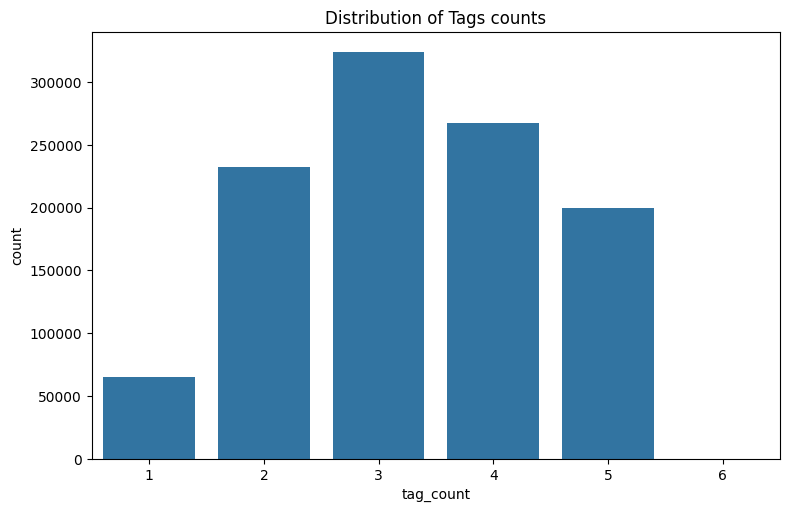

In [ ]:
# define figure size
fig = plt.figure(figsize=(8,5))
# countplot usinf seaborn
sns.countplot(x='tag_count',data=final_deduplicate_df)
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Distribution of Tags counts')
# showing plot
plt.show()

#### Analysis on unique tags and Most frequent tag

In [ ]:
# import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# instantiate object to do count of tags
CV = CountVectorizer(tokenizer = lambda x : x.split('|'))
# Bag of words for tags with frequencies of each tag
tag_bag_words = CV.fit_transform(final_deduplicate_df['tags'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tag_bag_words.shape

(1088418, 28185)

In [ ]:
print('Total Number of Unique Tags',tag_bag_words.shape[1])

Total Number of Unique Tags 28185


In [ ]:
# taking sum of each tags
# below line will sum the each column of sparce matrix and A1 converts matrix into array
tag_column_sum = tag_bag_words.sum(axis=0).A1
# make dictionary of each unique tag frequency count
tag_freq_count = dict(zip(CV.get_feature_names_out(),tag_column_sum))
# sort above dict in Descending order of tag count
tag_freq_count_sorted = dict(sorted(tag_freq_count.items(), key = lambda x: x[1], reverse = True))

In [ ]:
# top 10 most frequent tags
list(tag_freq_count_sorted.items())[:10]

[('javascript', np.int64(609751)),
 ('java', np.int64(468638)),
 ('jquery', np.int64(153590)),
 ('html', np.int64(127536)),
 ('android', np.int64(73559)),
 ('css', np.int64(55338)),
 ('reactjs', np.int64(44112)),
 ('node.js', np.int64(40226)),
 ('arrays', np.int64(37794)),
 ('php', np.int64(34464))]

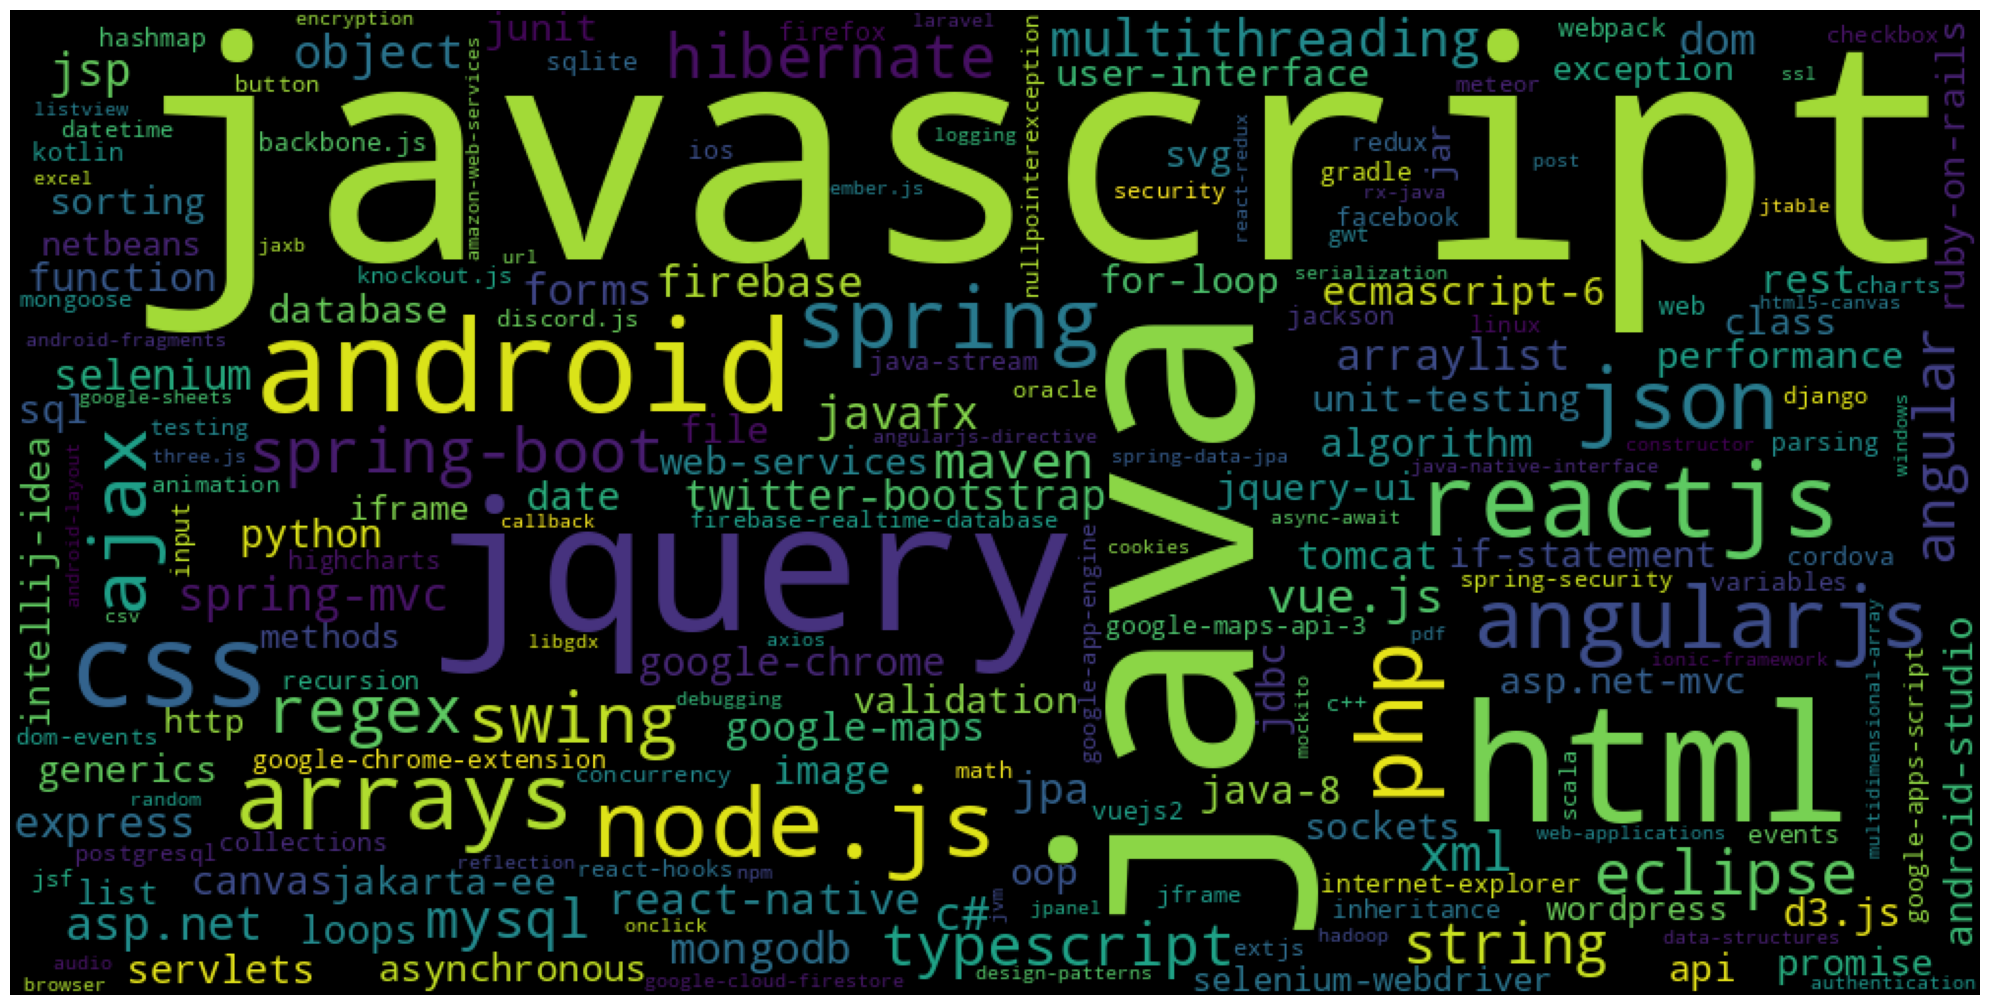

In [ ]:
# generate wordcloud from frequencies of tag counts
# Reference : https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud
Wcloud = WordCloud(width=1000,height=500)
Wcloud.generate_from_frequencies(tag_freq_count)
plt.figure(figsize=(20,20))
plt.imshow(Wcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Bar Plot of Top 10 tags vs frquency

In [ ]:
tags = list(tag_freq_count_sorted.keys())[:7]
freq = list(tag_freq_count_sorted.values())[:7]

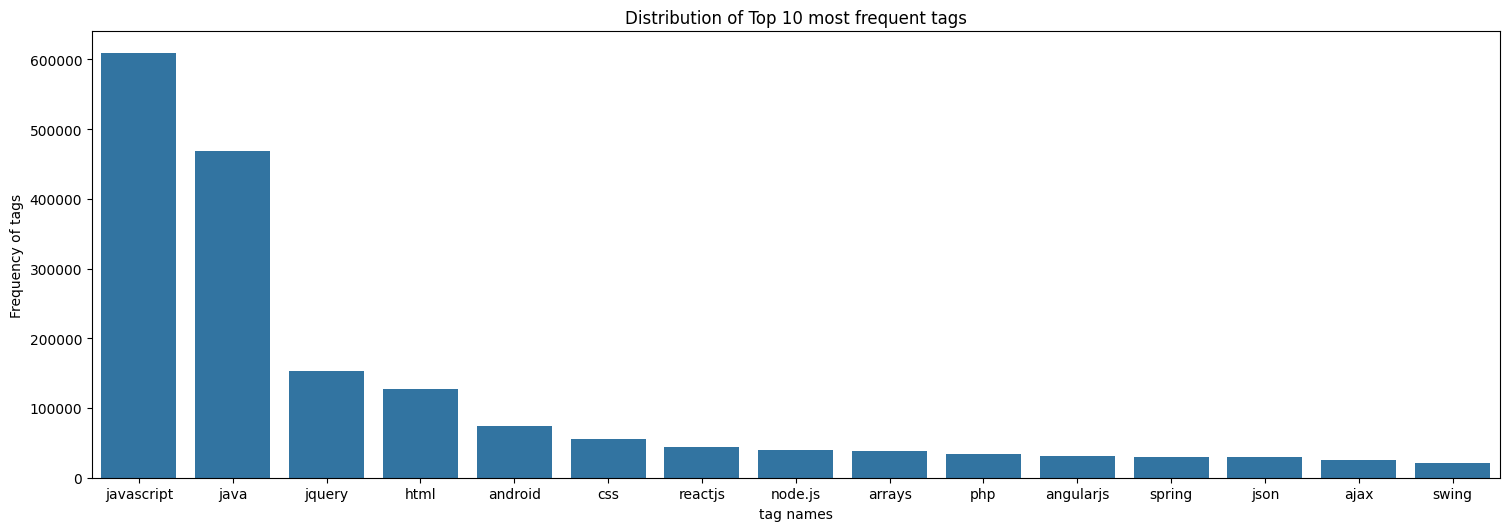

In [ ]:
# define figure size
fig = plt.figure(figsize=(15,5))
# Barplot using seaborn
sns.barplot(x=tags,y=freq)
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Distribution of Top 10 most frequent tags')
plt.xlabel('tag names')
plt.ylabel('Frequency of tags')
# showing plot
plt.show()

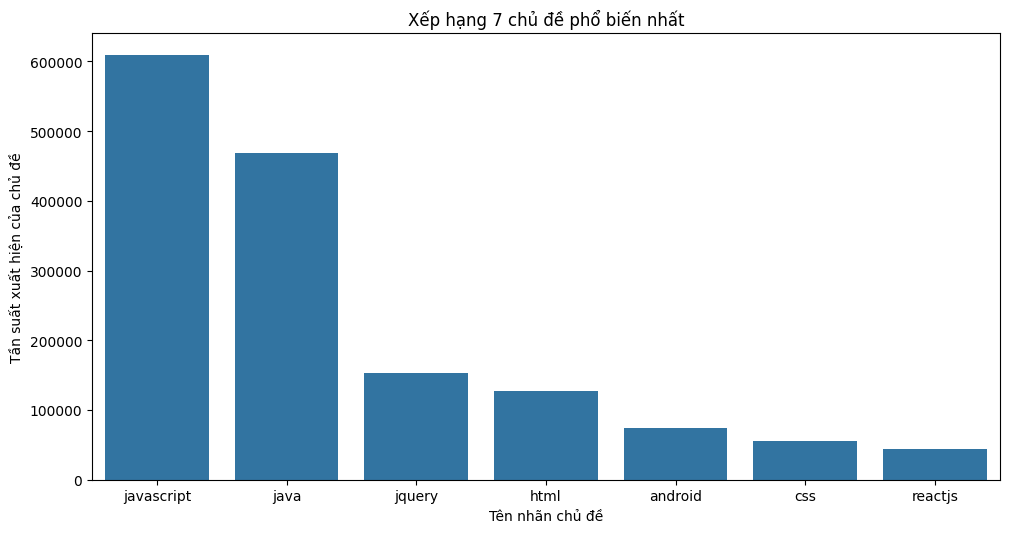

In [ ]:
# define figure size
fig = plt.figure(figsize=(10,5))
# Barplot using seaborn
sns.barplot(x=tags,y=freq)
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Xếp hạng 7 chủ đề phổ biến nhất')
plt.xlabel('Tên nhãn chủ đề')
plt.ylabel('Tần suất xuất hiện của chủ đề')
# showing plot
plt.show()

#### Plot for frequency distribution

Text(12.097222222222216, 0.5, 'frequency')

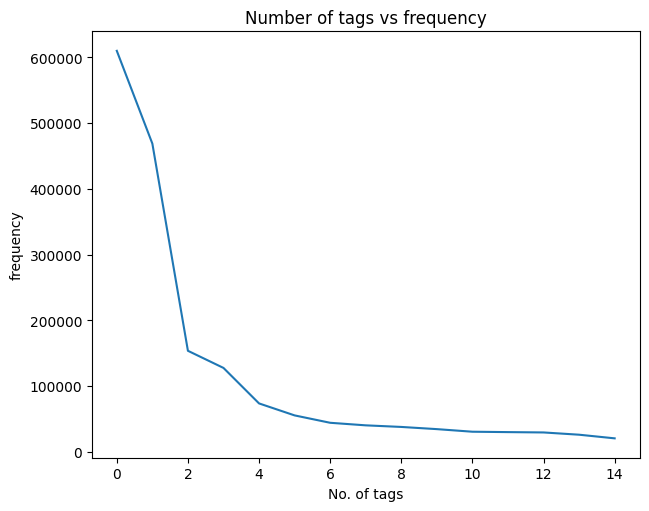

In [ ]:
plt.plot(freq)
plt.tight_layout()
plt.title('Number of tags vs frequency')
plt.xlabel('No. of tags')
plt.ylabel('frequency')